In [1]:
import cv2

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels=[]
file_name="Labels.txt"
with open (file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


#read an image

In [9]:
img=cv2.imread("test_image.png")

In [10]:
img

array([[[230, 208, 180],
        [230, 208, 180],
        [230, 208, 180],
        ...,
        [230, 209, 181],
        [230, 209, 181],
        [230, 209, 181]],

       [[230, 208, 180],
        [230, 208, 180],
        [230, 208, 180],
        ...,
        [230, 209, 181],
        [230, 209, 181],
        [230, 209, 181]],

       [[230, 208, 180],
        [230, 208, 180],
        [230, 208, 180],
        ...,
        [230, 209, 181],
        [230, 209, 181],
        [230, 209, 181]],

       ...,

       [[114, 133, 146],
        [113, 132, 145],
        [113, 132, 145],
        ...,
        [116, 133, 146],
        [117, 134, 147],
        [117, 134, 147]],

       [[115, 134, 147],
        [115, 134, 147],
        [114, 133, 146],
        ...,
        [117, 134, 147],
        [118, 135, 148],
        [118, 135, 148]],

       [[118, 137, 150],
        [118, 137, 150],
        [117, 136, 149],
        ...,
        [117, 134, 147],
        [118, 135, 148],
        [118, 135, 148]]

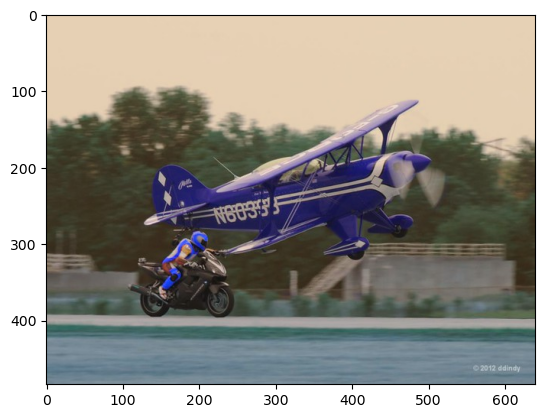

In [11]:
plt.imshow(img) #bgr

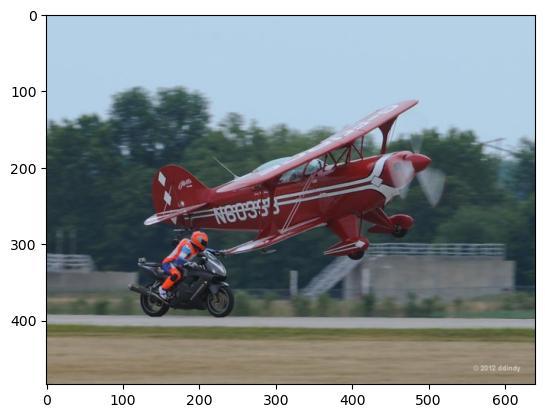

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #rgb

In [13]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002151B4A28F0>

In [14]:
ClassIndex,confidence,bbox = model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[5 4]


In [16]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font , fontScale=font_scale,color=(0,255,0),thickness=3)

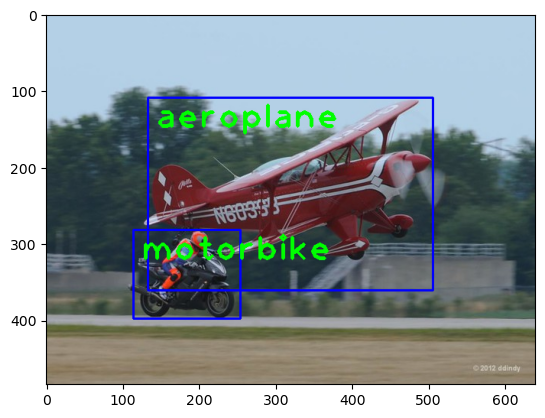

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))